# Plots for the Final Ray Experiment for the Preprocessing Stage

### Best Throughput
First of all, let's print the best throughput and its combinantion of parameters.

In [104]:
import pandas as pd

data = pd.read_csv('/home/joan/TFM/metrics_torchscript_embl_preprocess.csv')
best_throughput_row = data.loc[data['Throughput (img/sec)'].idxmax()]
    
# Print the best throughput and the corresponding parameters
print("Best Throughput:", best_throughput_row['Throughput (img/sec)'])
print("Corresponding Parameters:")
for col in best_throughput_row.index:
    print(f"{col}: {best_throughput_row[col]}")

Best Throughput: 192.4330156584869
Corresponding Parameters:
Job ID: 0a000000
Dataset: 2024-01-08_11h01m57s
Preserve order: True
Parallelism: 50
Num cpus: 4.0
Batch size map_batches(): 128
Dataset size (bytes): 1066949552
Num records dataset: 1772
Num blocks dataset: 17
Total time: 9.208399057388306
Throughput (img/sec): 192.4330156584869
Total time w/o metadata fetching: 8.08017897605896
Throughput w/o metadata fetching (img/sec): 219.3020730419857


### Preserve order
Now, let's analyze how the "Preserve order" parameter affects the Throughput. To calculate the average throughput when "Preserve order" is true and when it is false, we need to parse the CSV file and compute the average throughput for each scenario.

In [105]:
# Filter data where "Preserve order" is True
preserve_order_true = data[data["Preserve order"] == True]

# Filter data where "Preserve order" is False
preserve_order_false = data[data["Preserve order"] == False]

# Calculate average throughput when "Preserve order" is True
avg_throughput_true = preserve_order_true["Throughput (img/sec)"].mean()

# Calculate average throughput when "Preserve order" is False
avg_throughput_false = preserve_order_false["Throughput (img/sec)"].mean()

print("Average Throughput when Preserve order is True:", avg_throughput_true)
print("Average Throughput when Preserve order is False:", avg_throughput_false)


Average Throughput when Preserve order is True: 150.0542389746738
Average Throughput when Preserve order is False: 150.06058154102817


The analysis shows that there is very little difference in the average throughput when "Preserve order" is true compared to when it is false. The small difference between these values suggests that preserving the order of data doesn't significantly impact the throughput in this context. It indicates that the processing pipeline is efficient regardless of whether the order of data is preserved or not. Let's see this in a plot where the x-axis represents each combination of parameters when "Preserve order" is true or false and the y-axis represents the throughput.

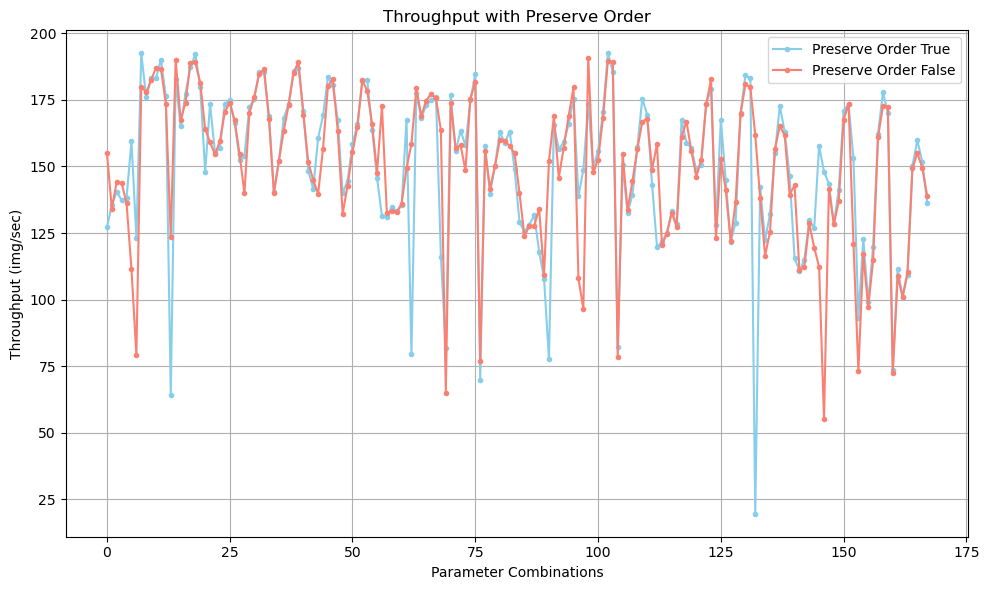

In [106]:
import matplotlib.pyplot as plt

# Filter data where "Preserve order" is True
preserve_order_true = data[data["Preserve order"] == True]

# Filter data where "Preserve order" is False
preserve_order_false = data[data["Preserve order"] == False]

# Create a list of parameter combinations for true and false cases
param_combinations_true = [(row["Dataset size (bytes)"], row["Parallelism"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in preserve_order_true.iterrows()]
param_combinations_false = [(row["Dataset size (bytes)"], row["Parallelism"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in preserve_order_false.iterrows()]

# Extract throughput values for true and false cases
throughput_values_true = preserve_order_true["Throughput (img/sec)"].tolist()
throughput_values_false = preserve_order_false["Throughput (img/sec)"].tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(param_combinations_true)), throughput_values_true, marker='.', color='skyblue', linestyle='-', label='Preserve Order True')
plt.plot(range(len(param_combinations_false)), throughput_values_false, marker='.', color='salmon', linestyle='-', label='Preserve Order False')
plt.xlabel('Parameter Combinations')
plt.ylabel('Throughput (img/sec)')
plt.title('Throughput with Preserve Order')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


As we can see, most of the time the results are the same or really similar independently of the order. We can conclude that this parameter is not relevant to the final output.

### Parallelism
Let's calculate the average throughput with each different value of parallelism (-1, 1, 25, 50, 100, 200) to see how relevant this parameter is.

In [147]:
# Group data by the "parallelism_read" value and calculate the mean throughput for each group
average_throughput_by_parallelism = data.groupby("Parallelism")["Throughput (img/sec)"].mean()

print("Average Throughput by Parallelism:")
print(average_throughput_by_parallelism)

Average Throughput by Parallelism:
Parallelism
-1      161.084686
 1      164.958356
 25     150.260833
 50     147.022493
 100    146.708093
 200    130.310001
Name: Throughput (img/sec), dtype: float64



Analyzing the average throughput by parallelism:

- Parallelism -1: The throughput is 161.08 img/sec. This is the default configuration for parallelism where the system manages parallelism automatically.

- Parallelism 1: The throughput is 164.96 img/sec. This suggests that using a single thread or process is very efficient in this scenario, perhaps due to the nature of the tasks or the hardware configuration.

- Parallelism 25, 50, 100: As parallelism increases beyond 1, the throughput slightly decreases. This could be due to the overhead of managing multiple parallel tasks or resource contention in the system.

- Parallelism 200: The throughput drops significantly to 130.31 img/sec. This might indicate that increasing parallelism beyond a certain point leads to diminishing returns or inefficiencies in the system, possibly due to resource limitations or contention.

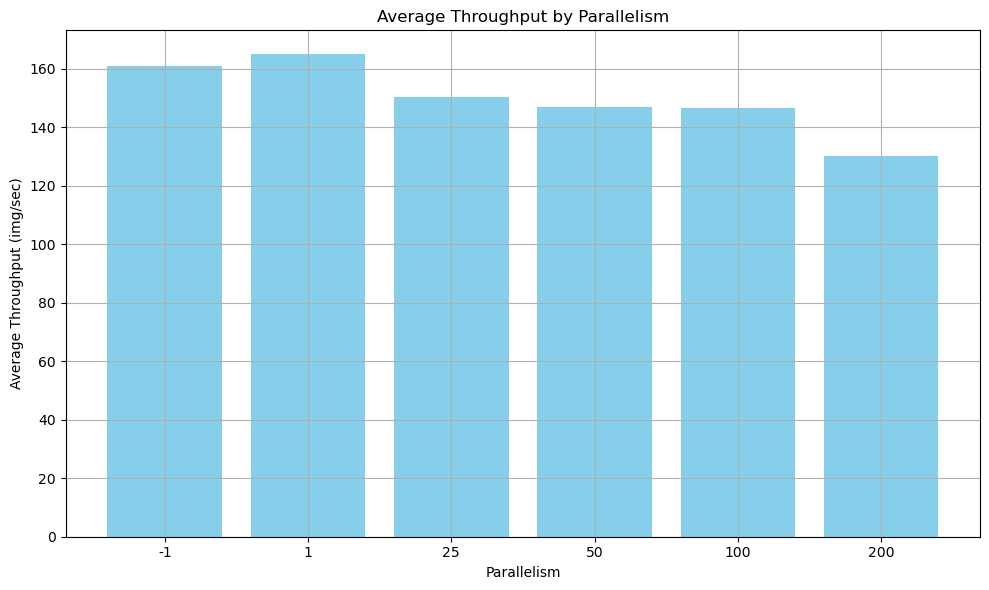

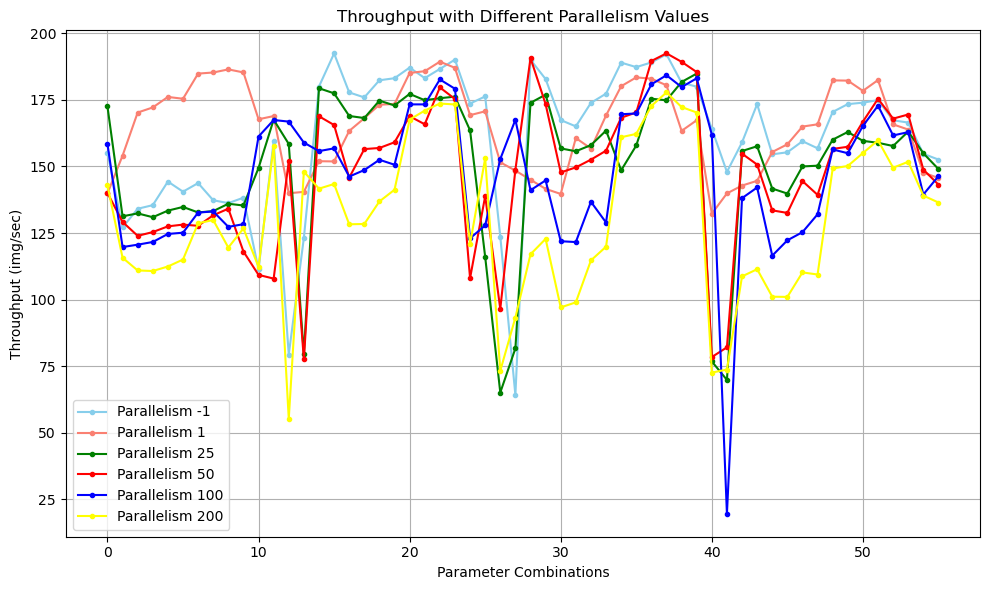

In [108]:
import matplotlib.pyplot as plt

average_throughput_by_parallelism = {
    -1: 161.084686,
    1: 164.958356,
    25: 150.260833,
    50: 147.022493,
    100: 146.708093,
    200: 130.310001
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_parallelism)), average_throughput_by_parallelism.values(), color='skyblue')
plt.xlabel('Parallelism')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Parallelism')
plt.xticks(range(len(average_throughput_by_parallelism)), average_throughput_by_parallelism.keys())
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter data where "Parallelism" is (-1, 1, 25, 50, 100, 200)
parallelism_1 = data[data["Parallelism"] == -1]
parallelism_2 = data[data["Parallelism"] == 1]
parallelism_3 = data[data["Parallelism"] == 25]
parallelism_4 = data[data["Parallelism"] == 50]
parallelism_5 = data[data["Parallelism"] == 100]
parallelism_6 = data[data["Parallelism"] == 200]

# Create a list of parameter combinations for each parallelism value (-1, 1, 25, 50, 100, 200)
param_combinations_1 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_1.iterrows()]
param_combinations_2 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_2.iterrows()]
param_combinations_3 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_3.iterrows()]
param_combinations_4 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_4.iterrows()]
param_combinations_5 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_5.iterrows()]
param_combinations_6 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Num cpus"], row["Batch size map_batches()"]) for _, row in parallelism_6.iterrows()]


# Extract throughput values for each parallelism value (-1, 1, 25, 50, 100, 200)
throughput_values_1 = parallelism_1["Throughput (img/sec)"].tolist()
throughput_values_2 = parallelism_2["Throughput (img/sec)"].tolist()
throughput_values_3 = parallelism_3["Throughput (img/sec)"].tolist()
throughput_values_4 = parallelism_4["Throughput (img/sec)"].tolist()
throughput_values_5 = parallelism_5["Throughput (img/sec)"].tolist()
throughput_values_6 = parallelism_6["Throughput (img/sec)"].tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(param_combinations_1)), throughput_values_1, marker='.', color='skyblue', linestyle='-', label='Parallelism -1')
plt.plot(range(len(param_combinations_2)), throughput_values_2, marker='.', color='salmon', linestyle='-', label='Parallelism 1')
plt.plot(range(len(param_combinations_3)), throughput_values_3, marker='.', color='green', linestyle='-', label='Parallelism 25')
plt.plot(range(len(param_combinations_4)), throughput_values_4, marker='.', color='red', linestyle='-', label='Parallelism 50')
plt.plot(range(len(param_combinations_5)), throughput_values_5, marker='.', color='blue', linestyle='-', label='Parallelism 100')
plt.plot(range(len(param_combinations_6)), throughput_values_6, marker='.', color='yellow', linestyle='-', label='Parallelism 200')
plt.xlabel('Parameter Combinations')
plt.ylabel('Throughput (img/sec)')
plt.title('Throughput with Different Parallelism Values')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


### Num cpus
Similarly to Parallelism, let's calculate the average throughput with each different num of cpus (1, 2, 4, 8) to see how relevant this parameter is.

In [149]:
# Group data by the "num_cpus" value and calculate the mean throughput for each group
average_throughput_by_num_cpus = data.groupby("Num cpus")["Throughput (img/sec)"].mean()

print("Average Throughput by Num CPUs:")
print(average_throughput_by_num_cpus)

Average Throughput by Num CPUs:
Num cpus
1.0    136.947433
2.0    156.981532
4.0    154.599779
8.0    151.700897
Name: Throughput (img/sec), dtype: float64


Let's analyze how the number of CPUs is affecting the throughput:

- Average Throughput Trend: As the number of CPUs increases from 1 to 2, there is a significant increase in the average throughput from 136.95 img/sec to 156.98 img/sec. This indicates that utilizing multiple CPUs concurrently has a positive impact on throughput, likely due to parallel processing capabilities.

- Diminishing Returns: However, as the number of CPUs further increases from 2 to 8, the average throughput experiences diminishing returns. This suggests that beyond a certain point, additional CPUs may not significantly improve throughput efficiency.

- Optimal Number of CPUs: Based on the data, the optimal number of CPUs for maximizing throughput seems to be around 2 or 4. Beyond this range, the marginal gains in throughput diminish, indicating that allocating more CPUs may not result in significant performance improvements compared to the associated resource costs.

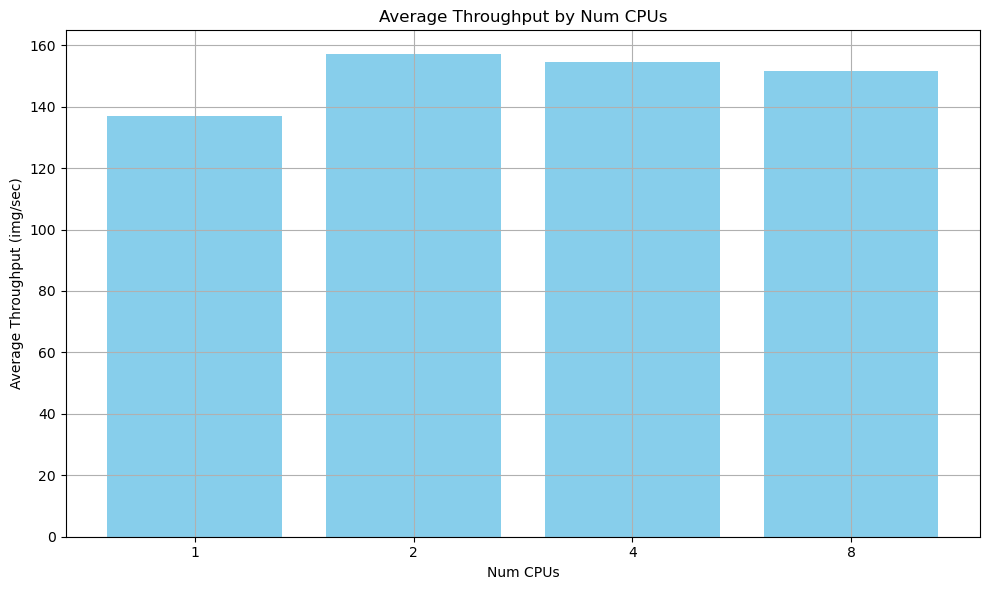

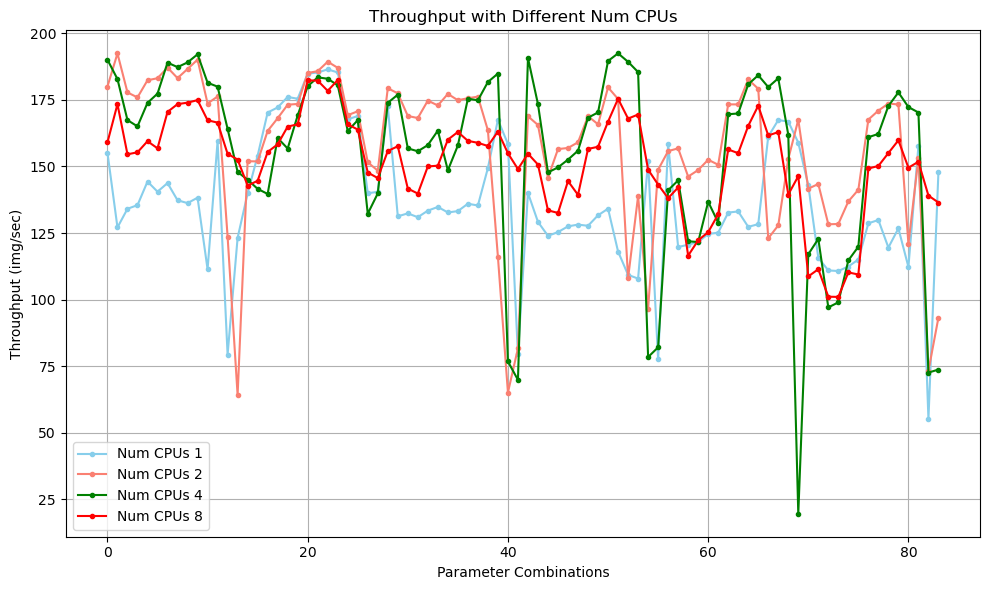

In [110]:
average_throughput_by_num_cpus = {
    1: 136.947433,
    2: 156.981532,
    4: 154.599779,
    8: 151.700897
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_num_cpus)), average_throughput_by_num_cpus.values(), color='skyblue')
plt.xlabel('Num CPUs')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Num CPUs')
plt.xticks(range(len(average_throughput_by_num_cpus)), average_throughput_by_num_cpus.keys())
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter data where "Num CPUs" is (1, 2, 4, 8)
num_cpus_1 = data[data["Num cpus"] == 1]
num_cpus_2 = data[data["Num cpus"] == 2]
num_cpus_3 = data[data["Num cpus"] == 4]
num_cpus_4 = data[data["Num cpus"] == 8]

# Create a list of parameter combinations for each value of "Num CPUs" (1, 2, 4, 8)
param_combinations_1 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in num_cpus_1.iterrows()]
param_combinations_2 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in num_cpus_2.iterrows()]
param_combinations_3 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in num_cpus_3.iterrows()]
param_combinations_4 = [(row["Dataset size (bytes)"], row["Preserve order"], row["Parallelism"], row["Batch size map_batches()"]) for _, row in num_cpus_4.iterrows()]

# Extract throughput values for each value of "Num CPUs" (1, 2, 4, 8)
throughput_values_1 = num_cpus_1["Throughput (img/sec)"].tolist()
throughput_values_2 = num_cpus_2["Throughput (img/sec)"].tolist()
throughput_values_3 = num_cpus_3["Throughput (img/sec)"].tolist()
throughput_values_4 = num_cpus_4["Throughput (img/sec)"].tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(param_combinations_1)), throughput_values_1, marker='.', color='skyblue', linestyle='-', label='Num CPUs 1')
plt.plot(range(len(param_combinations_2)), throughput_values_2, marker='.', color='salmon', linestyle='-', label='Num CPUs 2')
plt.plot(range(len(param_combinations_3)), throughput_values_3, marker='.', color='green', linestyle='-', label='Num CPUs 4')
plt.plot(range(len(param_combinations_4)), throughput_values_4, marker='.', color='red', linestyle='-', label='Num CPUs 8')
plt.xlabel('Parameter Combinations')
plt.ylabel('Throughput (img/sec)')
plt.title('Throughput with Different Num CPUs')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


### Batch Size of map_batches
Finally, let's see how the last parameter affects individually to the throughput with each different value: ['default', None, 8, 64, 128, 512, 1024]

In [151]:
# Group data by the "batch_size_map_batches" value and calculate the mean throughput for each group
average_throughput_by_batch_size_map_batches = data.groupby("Batch size map_batches()")["Throughput (img/sec)"].mean()

print("Average Throughput by Batch Size map_batches():")
print(average_throughput_by_batch_size_map_batches)

Average Throughput by Batch Size map_batches():
Batch size map_batches()
1024       121.318382
128        167.813250
512        157.644527
64         162.847677
8          148.110942
default    151.866706
Name: Throughput (img/sec), dtype: float64


Let's analyze how the batch size used in the `map_batches` operation affects the throughput:

1. **Average Throughput Trend**: 
   - The highest average throughput is observed when the batch size is 128 (167.81 img/sec), followed by batch sizes of 64 (162.85 img/sec) and 512 (157.64 img/sec). This suggests that larger batch sizes generally result in higher throughput, likely due to increased parallelism and better utilization of computational resources.
   - Conversely, the lowest throughput is observed when the batch size is 1024 (121.32 img/sec). This indicates that excessively large batch sizes may lead to decreased throughput, possibly due to increased overhead and reduced parallelism efficiency.
   - The throughput for the default batch size (151.87 img/sec) falls between the throughput values of the other batch sizes, indicating that the default setting is reasonably optimized for throughput efficiency.

2. **Optimal Batch Size**: 
   - Based on the data, the optimal batch size for maximizing throughput seems to be around 128 or 64. These batch sizes yield the highest throughput values, suggesting that they strike a balance between batch processing efficiency and computational resource utilization.

3. **Batch Size Selection Considerations**: 
   - While larger batch sizes generally lead to higher throughput, they may also increase memory consumption and training time per iteration. Therefore, selecting an appropriate batch size involves trade-offs between throughput, memory usage, and training efficiency.

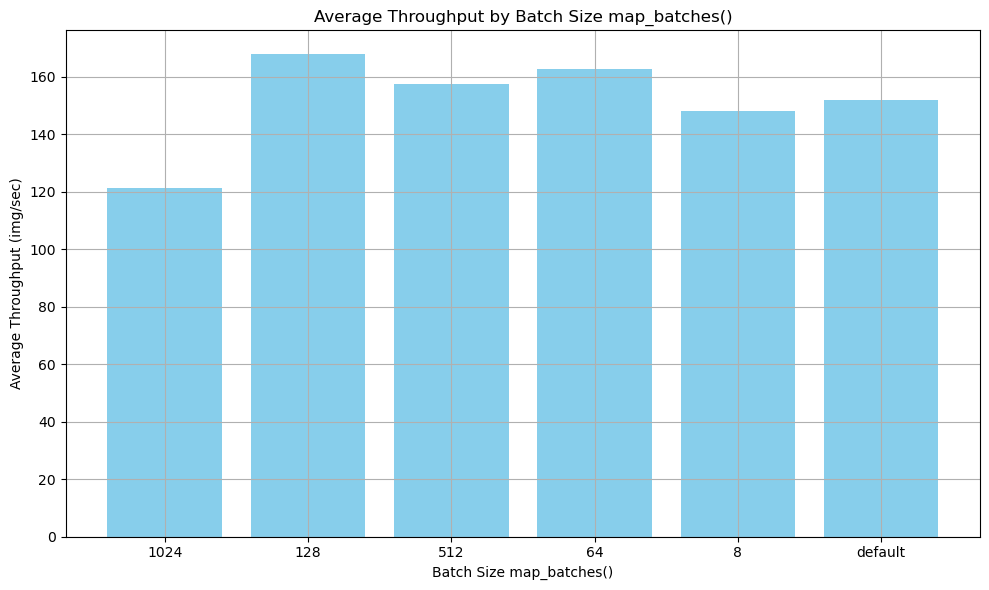

In [112]:
average_throughput_by_batch_size_map_batches = {
    1024:       121.318382,
    128:        167.813250,
    512:        157.644527,
    64:         162.847677,
    8:          148.110942,
    'default':  151.866706
    }

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_batch_size_map_batches)), average_throughput_by_batch_size_map_batches.values(), color='skyblue')
plt.xlabel('Batch Size map_batches()')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Batch Size map_batches()')
plt.xticks(range(len(average_throughput_by_batch_size_map_batches)), average_throughput_by_batch_size_map_batches.keys())
plt.grid(True)
plt.tight_layout()
plt.show()

## Extra Plots

So far, the analysis has evaluated each parameter individually, which is often useful. For instance, the best CPU counts identified were 2 and 4, aligning with the number 4 observed in the optimal parameter combination determined earlier that led to the highest throughput. A similar pattern emerges with batch size, where 128 is identified as the best value, again matching the optimal combination. However, this trend does not hold for parallelism, where the best values are -1 and 1, yet the top-performing combination features a parallelism of 50. This discrepancy underscores the importance of considering how parameters interact with each other to fully understand the dynamics at play. Let's take a look at some more complex plots.

### Heatmaps
These can be useful for visualizing the interaction between two parameters. Let's create some heatmaps of throughput

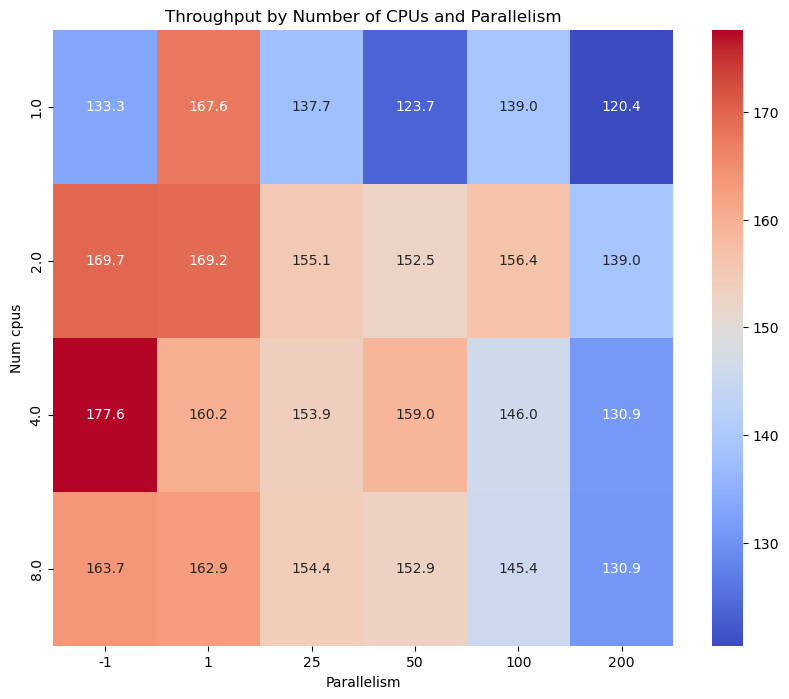

In [153]:
import seaborn as sns

heatmap_data = data.pivot_table(values='Throughput (img/sec)', index='Num cpus', columns='Parallelism', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Throughput by Number of CPUs and Parallelism')
plt.show()

Heatmap 1: Throughput by Number of CPUs and Parallelism
- **Observations**:
  - **Medium (2-4) CPUs generally lead to higher throughput**, especially at the 4 CPU mark, which seems to offer the best performance across different levels of parallelism.
  - **Parallelism at -1 and 1**: These settings show the most solid performance.
  - **Parallelism at higher values (100, 200)**: These settings do not consistently offer the best throughput. This might indicate that the overhead of managing many parallel tasks could negate the benefits of parallelism beyond a certain point.

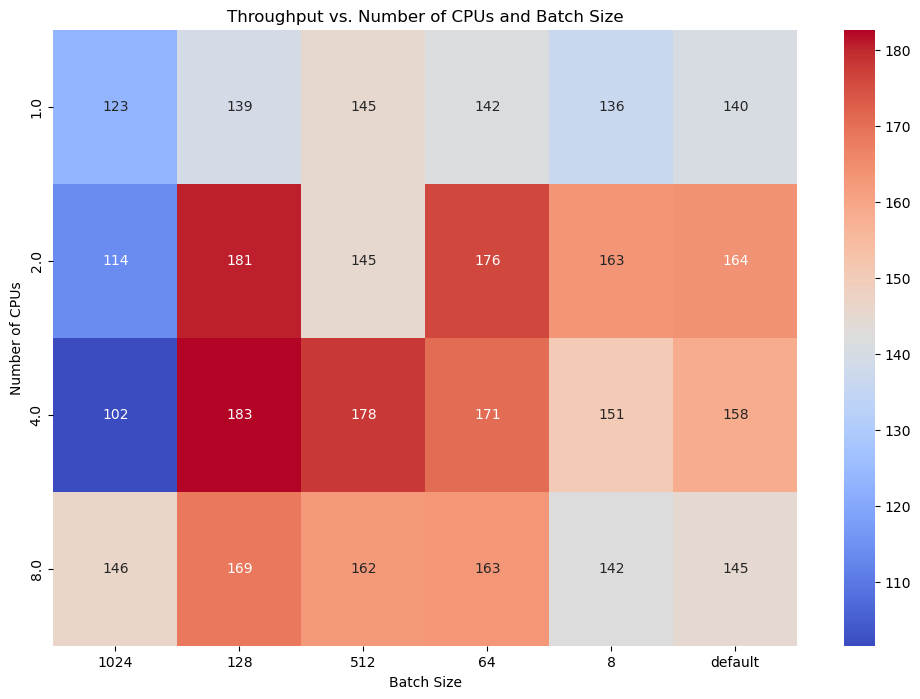

In [155]:
# Pivot the table for the heatmap data
heatmap1_data = data.pivot_table(values='Throughput (img/sec)', index='Num cpus', columns='Batch size map_batches()', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap1_data, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Throughput vs. Number of CPUs and Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Number of CPUs')
plt.show()

Heatmap 2: Throughput vs. Number of CPUs and Batch Size
- **Observations**:
  - **Medium CPUs**: There is a trend where medium CPUs generally improve throughput, particularly noticeable with 2 and 4 CPU settings. The performance gain from increasing CPUs seems to diminish with the largest batch sizes but also with lowest ones.
  - **Batch sizes**: Larger batch sizes do not consistently yield better throughput. In fact, medium batch sizes like 128 and 512 often perform better compared to very large (1024) or smaller batch sizes (8, 64). The default batch size, does not yield the highest throughput.

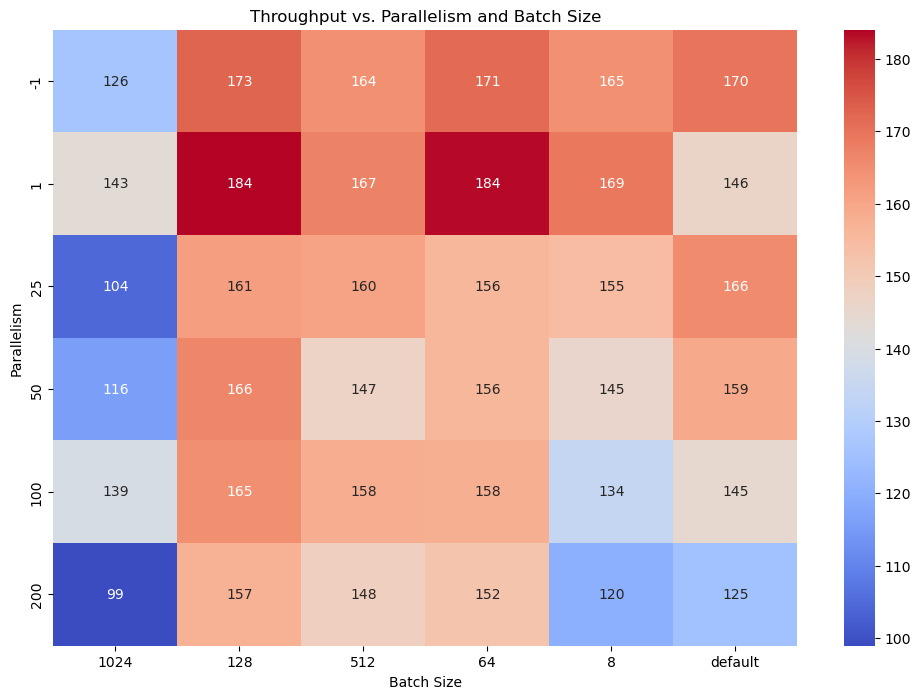

In [115]:
# Pivot the table for the second heatmap data
heatmap2_data = data.pivot_table(values='Throughput (img/sec)', index='Parallelism', columns='Batch size map_batches()', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap2_data, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Throughput vs. Parallelism and Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Parallelism')
plt.show()

Heatmap 3: Throughput vs. Parallelism and Batch Size
- **Observations**:
  - **High Parallelism**: At a parallelism of 1, throughput is higher across various batch sizes, suggesting that limited parallelism with a focus on effective batch processing might be beneficial.
  - **Batch Size Sensitivity**: There is significant sensitivity to batch size settings. Mid-range batch sizes (128, 512) generally perform better across different parallelism levels.
  - **Lower Parallelism (100, 200)**: At higher parallelism settings, throughput decreases, especially with very large or very small batch sizes. This could indicate inefficiencies in handling too many simultaneous tasks or data loading inefficiencies with smaller batches.

General Insights
1. **Optimal CPU Usage**: 2-4 CPUs tend to yield good performance, suggesting a sweet spot in resource allocation for the workload.
2. **Low Parallelism and Medium Batch Sizes**: Low levels of parallelism and medium batch sizes often yield the best results.

### 3D Scatter Plot
Finally, let's use a 3D scatter plot to plot three variables (Parallelism, Num cpus, and Batch size) on the axes and use color to represent the fourth variable (Throughput). This visualization allows to discern patterns and relationships between these parameters and their effect on throughput.

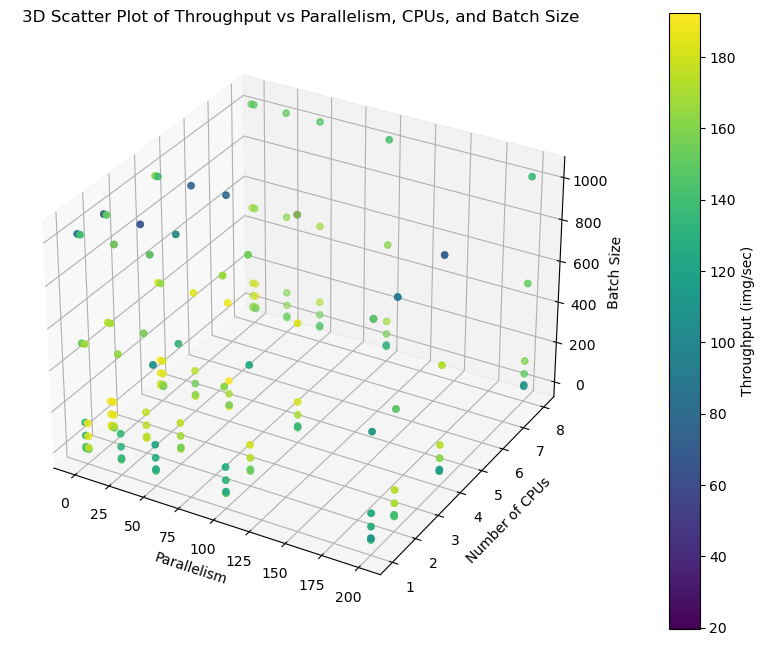

In [157]:
data = pd.read_csv('/home/joan/TFM/metrics_torchscript_embl_preprocess.csv')

# Replace 'default' with 0
data['Batch size map_batches()'] = data['Batch size map_batches()'].replace('default', 0)
data['Batch size map_batches()'] = pd.to_numeric(data['Batch size map_batches()'])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data['Parallelism'], data['Num cpus'], data['Batch size map_batches()'], c=data['Throughput (img/sec)'],
                     cmap='viridis', depthshade=True)

# Adding labels and title
ax.set_xlabel('Parallelism')
ax.set_ylabel('Number of CPUs')
ax.set_zlabel('Batch Size')
ax.set_title('3D Scatter Plot of Throughput vs Parallelism, CPUs, and Batch Size')

# Color bar to show throughput values
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Throughput (img/sec)')

plt.show()


Observations:

1. **Batch Size Impact:**
   - Lower batch sizes seem to generally result in higher throughput.
   - The points in the lower regions of the plot tend to be colored towards the yellow of the spectrum, which suggests higher throughput rates.

2. **CPU Numbers:**
   - Medium CPUs show a positive trend with throughput. Some configurations with fewer CPUs perform similarly to configurations with more CPUs.

3. **Parallelism:**
   - Lower values seem to generally result in higher throughput.